# Clothing recongnizer

In [1]:
!pip install -Uqq fastai gradio nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.9/321.9 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 98.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 73.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/

In [8]:
from fastai import *
from fastai.vision.all import *
from fastai.vision.widgets import *

In [66]:
#!export
from fastai.vision.all import load_learner
import gradio as gr

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
model_path="/content/drive/MyDrive/Clothing Classifications/models/clothing-recognizer-v9-resnet32-epoch3-bs32.pkl"
test_path="/content/drive/MyDrive/Clothing Classifications/test_images"

In [12]:
def get_labels_with_category(path):
    parts = list(path.parent.parts[-2:])  # Extract the last two folder names (Main Category, Item)


    return f"{parts[1]};{parts[0]}"

In [13]:
#!export
model = load_learner(model_path)

In [48]:
#!export
clothing_labels = [
    "Blazers;Upper Wear",
    "Boots;Accessories",
    "Formal Pants;Lower Wear",
    "Handbags;Accessories",
    "Hats;Accessories",
    "High Heels;Accessories",
    "Hoodies;Upper Wear",
    "Jackets;Upper Wear",
    "Jeans;Lower Wear",
    "Joggers;Lower Wear",
    "Sandals;Accessories",
    "Shirts;Upper Wear",
    "Shorts;Lower Wear",
    "Sneakers;Accessories",
    "Sweaters;Upper Wear",
    "T-Shirts;Upper Wear",
    "Watches;Accessories"
]



In [50]:
# def recognize_image(image):
#   pred, idx, probs = model.predict(image)
#   print(pred,idx,probs)
#   return dict(zip(clothing_labels, map(float, probs)))

In [74]:
def recognize_image(image):
    pred, idx, probs = model.predict(image)

    subcategory, main_category = pred.split(';')
    formatted_pred = f"{subcategory} ({main_category})"

    label_probs = {f"{subcat} ({main_cat})": float(prob) for (subcat, main_cat), prob in zip((label.split(';') for label in clothing_labels), probs)}

    print(f"Prediction: {formatted_pred}")
    print(f"Probability: {label_probs[formatted_pred]:.4f}")

    return label_probs


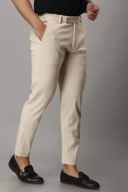

In [76]:
img = PILImage.create("/content/drive/MyDrive/Clothing Classifications/test_images/sample1.jpg")
img.thumbnail((192,192))
img

In [77]:
recognize_image(img)

Prediction: Formal Pants (Lower Wear)
Probability: 0.9259


{'Blazers (Upper Wear)': 1.8890568753704429e-06,
 'Boots (Accessories)': 2.007999864872545e-05,
 'Formal Pants (Lower Wear)': 0.9258865714073181,
 'Handbags (Accessories)': 1.3635352843266446e-05,
 'Hats (Accessories)': 4.197041198494844e-05,
 'High Heels (Accessories)': 7.975385233294219e-05,
 'Hoodies (Upper Wear)': 1.4407723938347772e-05,
 'Jackets (Upper Wear)': 2.785650849546073e-06,
 'Jeans (Lower Wear)': 2.4767976356088184e-05,
 'Joggers (Lower Wear)': 0.07340112328529358,
 'Sandals (Accessories)': 7.556132914032787e-06,
 'Shirts (Upper Wear)': 7.677252142457291e-05,
 'Shorts (Lower Wear)': 0.0003688909928314388,
 'Sneakers (Accessories)': 2.0569163098116405e-05,
 'Sweaters (Upper Wear)': 1.2809265172109008e-05,
 'T-Shirts (Upper Wear)': 1.7605930224817712e-06,
 'Watches (Accessories)': 2.4776622012723237e-05}

In [69]:
doc(gr.Image)

Image(value: 'str | PIL.Image.Image | np.ndarray | Callable | None' = None, *, format: 'str' = 'webp', height: 'int | str | None' = None, width: 'int | str | None' = None, image_mode: "Literal['1', 'L', 'P', 'RGB', 'RGBA', 'CMYK', 'YCbCr', 'LAB', 'HSV', 'I', 'F'] | None" = 'RGB', sources: "list[Literal['upload', 'webcam', 'clipboard']] | Literal['upload', 'webcam', 'clipboard'] | None" = None, type: "Literal['numpy', 'pil', 'filepath']" = 'numpy', label: 'str | None' = None, every: 'Timer | float | None' = None, inputs: 'Component | Sequence[Component] | set[Component] | None' = None, show_label: 'bool | None' = None, show_download_button: 'bool' = True, container: 'bool' = True, scale: 'int | None' = None, min_width: 'int' = 160, interactive: 'bool | None' = None, visible: 'bool' = True, streaming: 'bool' = False, elem_id: 'str | None' = None, elem_classes: 'list[str] | str | None' = None, render: 'bool' = True, key: 'int | str | None' = None, mirror_webcam: 'bool' = True, show_share_

In [78]:
image = gr.Image(width=192, height=192)
label = gr.Label()

examples = [
    "/content/drive/MyDrive/Clothing Classifications/test_images/sample1.jpg",
    "/content/drive/MyDrive/Clothing Classifications/test_images/sample2.jpg",
    "/content/drive/MyDrive/Clothing Classifications/test_images/sample3.jpg",
    "/content/drive/MyDrive/Clothing Classifications/test_images/sample4.jpg"
]

iface = gr.Interface(fn=recognize_image, inputs=image, outputs=label, examples=examples)
iface.launch(inline=False)

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://76848b60a10e0eed4c.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
